$$\frac{dx}{dt}=-kx\Rightarrow \frac{dx}{x}=-kdt \Rightarrow = \int_{0.2}^x\frac{dx}{x}=-\int_0^3kdt \Rightarrow \boxed{x =0.2e^{-kt}} $$

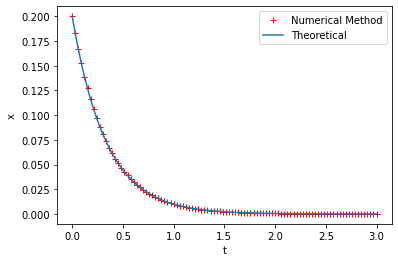

In [15]:
# Demo
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
k = 3
N = 100
t = np.linspace(0,3,N)

def f(x,t):
    dxdt = -k*x
    return dxdt

x = 0.2

solution = odeint(f,x,t)
y = 0.2*np.exp(-k*t)
plt.plot(t,solution,'r+',label='Numerical Method')
plt.plot(t,y,label='Theoretical')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.savefig('example.pdf')
plt.show()

$$m\ddot{x}=-kx$$

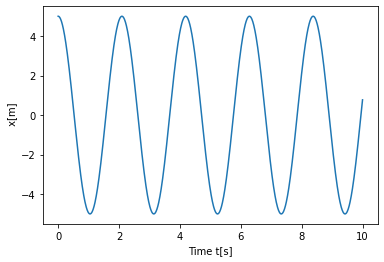

In [16]:
# Oscilator 
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# System Parameters
[k, m] = [9, 1]
# Initial Conditions
x = [5,0]
# Simulation parameters
N = 1000
t = np.linspace(0,10,N)

def f(x,t):
    dvdt = -(k/m)*x[0]
    dxdt = x[1]
    return [dxdt,dvdt]

solution = odeint(f,x,t)
plt.plot(t,solution[:,0])
plt.xlabel('Time t[s]')
plt.ylabel(' x[m]')
plt.savefig('simple.pdf')
plt.show()

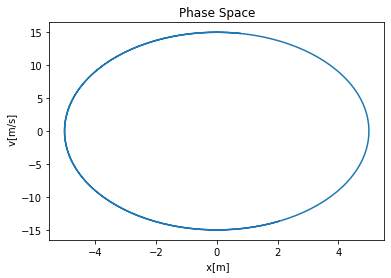

In [17]:
plt.figure
plt.plot(solution[int(N/1.5):,0],solution[int(N/1.5):,1])
plt.title('Phase Space')
plt.xlabel(' x[m]')
plt.ylabel(' v[m/s]')
plt.savefig('PhaseSpace_simple.pdf')
plt.show()

### Dumped Oscilator
$$m\ddot{x}=-kx-\beta \dot{x}$$

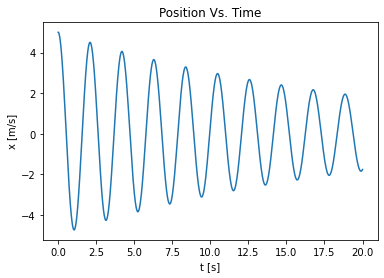

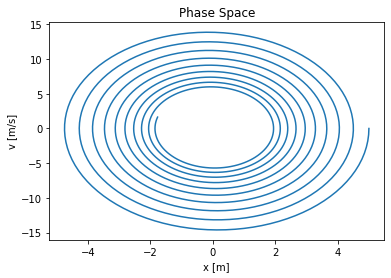

In [18]:
# Dumped Oscilator

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# System Parameters
[k, m, b] = [9,1 ,0.1]
# Initial Conditions
x = [5,0]
# Simulation parameters
N = 1000
t = np.linspace(0,20,N)
def f(x,t):
    dvdt = -(k/m)*x[0]-(b/m)*x[1]
    dxdt = x[1]
    return [dxdt,dvdt]

solution = odeint(f,x,t)

plt.plot(t,solution[:,0])
plt.title('Position Vs. Time')
plt.xlabel('t [s]')
plt.ylabel('x [m/s]')
plt.savefig('Dumped.pdf')
plt.show()


plt.plot(solution[:,0],solution[:,1])
plt.title('Phase Space')
plt.xlabel('x [m]')
plt.ylabel('v [m/s]')
plt.savefig('Dumped_ps.pdf')
plt.show()



#### External force

$$A_t = \frac{A}{\sqrt{m^2(\omega_o^2-\omega^2)^2+\beta^2\omega^2}}$$
$$\delta = \tan^{-1}\left (\frac{\beta \omega}{m(\omega_o^2-\omega^2)} \right )$$
$$x_{t}(t)= A_t \sin(\omega t -\delta) $$

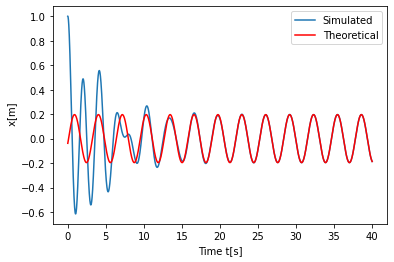

In [19]:
# External Force
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# System Parameters
[k, m, b, A] = [9, 1 ,0.5 ,1]
# Natural frequency
w_o = np.sqrt(k/m)
w = 2
# Initial Conditions
x=[1,0]
# Simulation parameters
N = 5000
t = np.linspace(0,40,N)

def f(x,t):
    dvdt = (-(k)*x[0]-b*x[1]+A*np.sin(w*t))/m
    dxdt = x[1]
    return [dxdt,dvdt]

solution = odeint(f,x,t)

At = (A)/np.sqrt((m**2)*(w_o**2-w**2)**2+(b*w)**2)
delta = np.arctan((b*w)/(m*(w_o**2-w**2)))
xt  = At*np.sin(w*t - delta)

plt.plot(t,solution[:,0],label='Simulated')
plt.plot(t,xt,'r',label='Theoretical')
plt.legend()
plt.xlabel('Time t[s]')
plt.ylabel(' x[m]')
plt.savefig('Stable.pdf')
plt.show()

$$Α_t = \frac{A}{\sqrt{(\omega_o^2-\omega^2)^2+b^2\omega^2}}$$

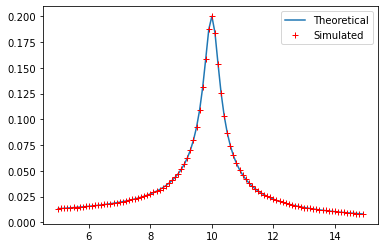

In [20]:
# Resonance
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# System Parameters
[k, m, b, A] = [100, 1 ,0.5 ,1]
# Natural frequency
#w_o = np.sqrt(k/m);
w_o = np.sqrt(k/m)
# Range of frequencies
wt = np.arange(w_o-w_o/2,w_o+w_o/2,0.1)

# Initial Conditions
x=[1,0]
# Simulation parameters
N = 500
t = np.linspace(0,40,N)
Amax = np.zeros(len(wt))

def f(x,t):
    dvdt = (-(k)*x[0]-b*x[1]+A*np.sin(w*t))/m
    dxdt = x[1]
    return [dxdt,dvdt]

for i in range(len(wt)):
    w = wt[i]
    solution = odeint(f,x,t)
    Amax[i] = np.max(solution[-100:,0])

# For theoritical
At = A/np.sqrt((w_o**2-wt**2)**2+b**2*wt**2)

plt.plot(wt,At,label='Theoretical')
plt.plot(wt,Amax,'r+',label='Simulated')
plt.legend()
plt.savefig('resonance.pdf')
plt.show()

#### Driven dumped pendulum

$$\ddot{\theta}=-\frac{g}{L}\sin \theta-\beta \dot{\theta}+A\sin(\omega t) $$

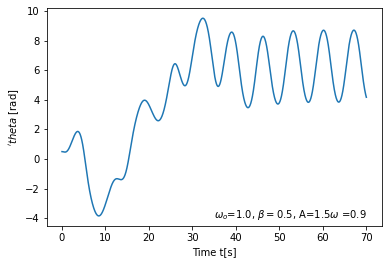

In [21]:
# Driven dumped pendulum
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# System Parameters
[g, L, b, A, w] = [10, 10 ,0.5 ,1.5, 0.9]
# Initial Conditions
x=[0.5,0]
# Simulation parameters
N = 5000
t = np.linspace(0,70,N)
def f(x,t):
    dvdt = -(g/L)*np.sin(x[0])-b*x[1]+A*np.sin(w*t)
    dxdt = x[1]
    return [dxdt,dvdt]

solution = odeint(f,x,t)
plt.plot(t,solution[:,0])
plt.xlabel('Time t[s]')
plt.ylabel('$\'theta$ [rad]')
plt.text(35, -4,'$\omega_o$='+str(g/L)+', $\\beta=$'+str(b)+', A='+str(A)+'$\omega$ ='+str(w))
plt.savefig('ddp'+str(A)+'.pdf')
plt.show()

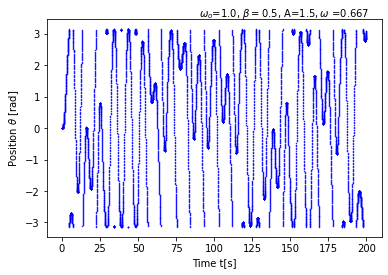

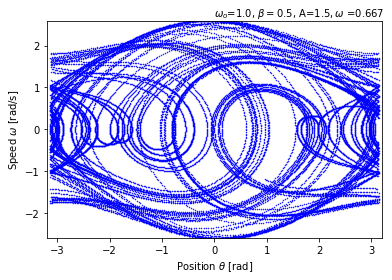

In [1]:
# Driven dumped pendulum from order to chaos
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# System Parameters
[g, L, b, w , A] = [10, 10 ,0.5 , 2/3, 1.5]
# Initial Conditions
x=[0,0]
# Simulation parameters
N = 50000
t = np.linspace(0,1000,N)
def f(x,t):
    dvdt = -(g/L)*np.sin(x[0])-b*x[1]+A*np.sin(w*t)
    dxdt = x[1]
    return [dxdt,dvdt]

solution = odeint(f,x,t)

# Pozition only at -pi to pi
for i, position in enumerate(solution[:,0]):
    while position > np.pi:
        position = position-(2.0*np.pi)
    while position <- np.pi:
        position = position+(2.0*np.pi)
    solution[i,0] = position

w_str = "{:.3}".format(w)
infobox = '$\omega_o$='+str(g/L)+', $\\beta=$'+str(b)+', A='+str(A)+'$, \omega$ ='+w_str
    
plt.plot(t[:int((N/5))],solution[:int((N/5)),0],'b.',markersize=1)
plt.xlabel('Time t[s]')
plt.ylabel('Position $\\theta$ [rad]')
plt.text(90,np.max(solution[:,0])+0.4,infobox)
plt.savefig('xt'+str(A)+'.pdf')
plt.show()

plt.figure
plt.plot(solution[int((N/2)):,0],solution[int((N/2)):,1],'b.',markersize=1)
plt.xlabel('Position $\\theta$ [rad]')
plt.ylabel('Speed $\omega$ [rad/s]')
plt.xlim([-3.2, 3.2])
plt.ylim([-2.6, 2.6])
plt.text(0,2.7,infobox)
plt.savefig('xv'+str(A)+'.pdf')
plt.show()

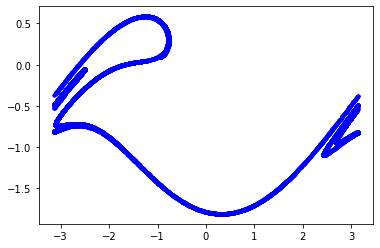

In [11]:
# Poincare section
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# System Parameters
[g, L, b, A, w] = [10, 10 ,0.5 ,1.15, 0.6667]
# Initial Conditions
x=[0,0]
# Simulation Parameters
T = 2*np.pi/w
N  = 501
ti = 0
tf = T
# Poincare points and coordinate matrices 
Np = 25000
Xp =[]
Yp =[]

def f(x,t):
    dvdt = -(g/L)*np.sin(x[0])-b*x[1]+A*np.sin(w*t)
    dxdt = x[1]
    return [dxdt,dvdt]

for i in range(Np):
    t =  np.linspace(ti,tf,N) + i*T
    solution = odeint(f,x,t)
    # Pozition only at -pi to pi
    for i, position in enumerate(solution[:,0]):
        while position > np.pi:
            position = position-(2.0*np.pi)
        while position <- np.pi:
            position = position+(2.0*np.pi)
    solution[i,0] = position
    x = solution[-1,:]
    Xp.append(x[0])
    Yp.append(x[1])

plt.plot(Xp,Yp,'b.')
plt.savefig('PoincareDDP.pdf')
plt.show()


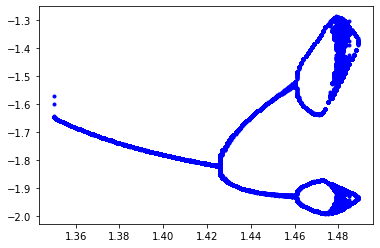

In [13]:
# Poincare section
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# System Parameters
[g, L, b, w] = [10, 10 ,0.5, 0.6667]
A_bif = np.arange(1.35,1.49, 0.001)
# Initial Conditions
x=[0,0]
# Simulation Parameters
T = 2*np.pi/w
N  = 501
ti = 0
tf = T
# Poincare points and coordinate matrices 
Np = 500
Xp =[]
Yp =[]
# Biffuracation points
Bif = np.zeros((len(A_bif),Np))

def f(x,t):
    dvdt = -(g/L)*np.sin(x[0])-b*x[1]+A*np.sin(w*t)
    dxdt = x[1]
    return [dxdt,dvdt]

for j in range(len(A_bif)):
    A = A_bif[j]
    for i in range(Np):
        t =  np.linspace(ti,tf,N) + i*T
        solution = odeint(f,x,t)
        # Pozition only at -pi to pi
        for i, position in enumerate(solution[:,0]):
            while position > np.pi:
                position = position-(2.0*np.pi)
            while position <- np.pi:
                position = position+(2.0*np.pi)
        solution[i,0] = position
        x = solution[-1,:]
        Xp.append(x[0])
        Yp.append(x[1])
    Bif[j,:] = Yp
    Xp=[]
    Yp=[]

plt.plot(A_bif,Bif,'b.')

plt.show()


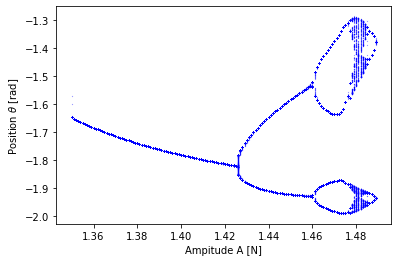

In [14]:
plt.plot(A_bif,Bif,'b.',markersize=0.3)
plt.ylabel('Position $\\theta$ [rad]')
plt.xlabel('Ampitude A [N]')
plt.savefig('BiffurcationDDP.pdf')
plt.show()

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# System Parameters
[wo, b, A, w] = [3.14, 0.5 ,1, 2]
# Initial Conditions
x=[1,0]
# Simulation parameters
N = 4000
dt = 0.01

t = np.arange(0,N*dt,dt)

def f(x,t):
    dvdt = -wo**2*np.sin(x[0]) -b*x[1] - A*np.cos(w*t)
    dxdt = x[1]
    return [dxdt,dvdt]

solution = odeint(f,x,t)

# Pozition only at -pi to pi
for i, position in enumerate(solution[:,0]):
    while position > np.pi:
        position = position-(2.0*np.pi)
    while position <- np.pi:
        position = position+(2.0*np.pi)
    solution[i,0] = position

plt.plot(t,solution[:,0])
plt.xlabel('Time t[s]')
plt.ylabel(' x[m]')
plt.savefig('Friction.pdf')
plt.show()

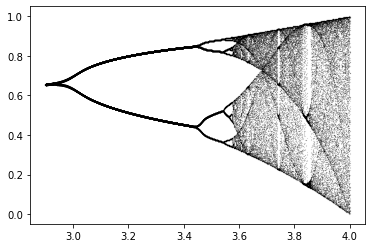

In [46]:
import numpy as np
import matplotlib.pyplot as plt

N = 50 
r = np.arange(2.9,4,0.0001)
bif = np.zeros([len(r),10])
for j in range(len(r)):
    x = 0.2*np.ones(N)
    for i in range(N-1):
        x[i+1] =  r[j] * x[i] * (1 - x[i])
    bif[j,:] = x[-10:]

plt.plot(r,bif,'k.',markersize=0.1)
plt.show()

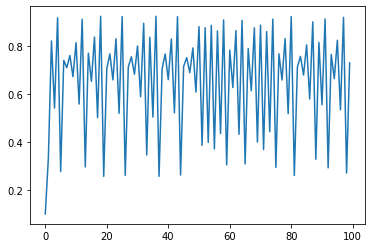

In [10]:
N=100
r=3.7
x = 0.1*np.ones(N)
for i in range(N-1):
    x[i+1] =  r * x[i] * (1 - x[i])
    
plt.plot(x)
plt.show()

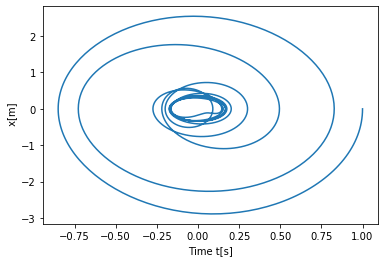

In [75]:
plt.figure
plt.plot(solution[:,0],solution[:,1])
plt.xlabel('Time t[s]')
plt.ylabel(' x[m]')
plt.savefig('Friction.pdf')
plt.show()

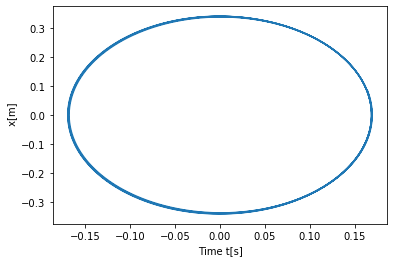

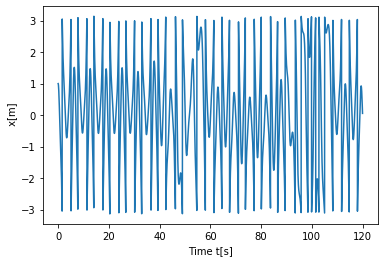

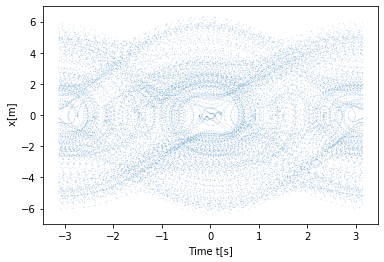

In [19]:
# Anagostopoulou
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# System Parameters
[wo, b, A, w] = [1, 0.2 ,4.5, 2]
# Initial Conditions
x=[1,0]
# Simulation parameters
N  = 50000
Nt = 25000
tf = 2000
t = np.linspace(0,tf,N)

def f(x,t):
    dvdt = -b*x[1] - wo**2*np.sin(x[0]) - 2*A*np.cos(w*t)*np.sin(x[0])
    dxdt = x[1]
    return [dxdt,dvdt]

solution = odeint(f,x,t)

# Pozition only at -pi to pi
for i, position in enumerate(solution[:,0]):
    while position > np.pi:
        position = position-(2.0*np.pi)
    while position <- np.pi:
        position = position+(2.0*np.pi)
    solution[i,0] = position

plt.figure
plt.plot(t[0:3000],solution[0:3000,0])
plt.xlabel('Time t[s]')
plt.ylabel(' \theta')
plt.savefig('xt'+str(A)+'.pdf')
plt.show()    
    
plt.figure
plt.plot(solution[Nt:,0],solution[Nt:,1],'.',markersize=0.1)
plt.xlabel('Time t[s]')
plt.ylabel(' \theta')
plt.savefig('xv'+str(A)+'.pdf')
plt.show()

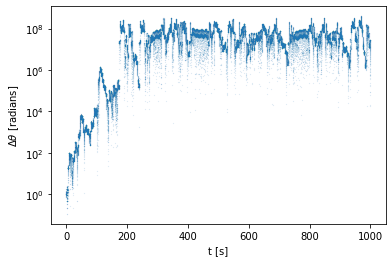

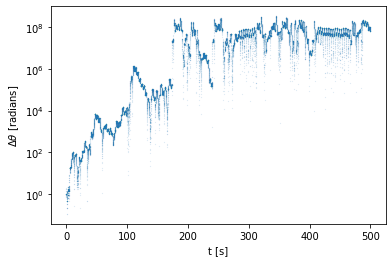

In [30]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# System Parameters
[g, L, b, w , A] = [10, 10 ,0.5 , 0.9, 1.5]
# Initial Conditions
eps = 1e-15
x1=[0,0]
x2=[eps,0]

# Simulation parameters
N = 50000
t = np.linspace(0,1000,N)
def f(x,t):
    dvdt = -(g/L)*np.sin(x[0])-b*x[1]+A*np.sin(w*t)
    dxdt = x[1]
    return [dxdt,dvdt]

def pilimit(solution):
    # Pozition only at -pi to pi
    for i, position in enumerate(solution[:,0]):
        while position > np.pi:
            position = position-(2.0*np.pi)
        while position <- np.pi:
            position = position+(2.0*np.pi)
        solution[i,0] = position
    return solution

solution1 = odeint(f,x1,t)
x1 = pilimit(solution1)
solution2 = odeint(f,x2,t)
x2 = pilimit(solution2)


Dx = np.abs(x2-x1)/eps
plt.semilogy(t,Dx[:,0],'.',markersize=0.1)
plt.ylabel('$\Delta \\theta$ [radians]')
plt.xlabel('t [s]')
plt.savefig('lyap1.pdf')
plt.show()

plt.semilogy(t[:int(N/2)],Dx[:int(N/2),0],'.',markersize=0.1)
plt.ylabel('$\Delta \\theta$ [radians]')
plt.xlabel('t [s]')
plt.savefig('lyap2.pdf')
plt.show()

0.06629152230465289


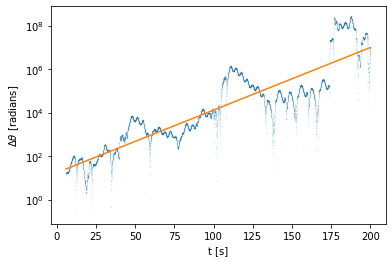

In [76]:
start =300
finish= 10000
a = np.polyfit(t[start:finish], np.log(Dx[start:finish,0]), 1)
print(a[0])
# Lyap line
lyap = np.exp(a[0]*t[start:finish]+a[1])
plt.semilogy(t[start:finish],Dx[start:finish,0],'.',markersize=0.1)
plt.semilogy(t[start:finish],lyap)
plt.ylabel('$\Delta \\theta $ [radians]')
plt.xlabel('t [s]')
plt.show()